In [2]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [3]:
data_dict = pickle.load(open('matrix data/data4.pickle', 'rb'))

data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, shuffle=True, stratify=labels)

In [4]:
model_dict = pickle.load(open('models/model4.p', 'rb'))
model = model_dict['model']

In [5]:
y_predict = model.predict(x_test)

In [6]:
accuracy_score(y_predict, y_test)

0.999003984063745

In [7]:
classification_report(y_predict, y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        40\n           1       1.00      1.00      1.00        39\n          10       1.00      1.00      1.00        37\n          11       1.00      1.00      1.00        40\n          12       1.00      1.00      1.00        40\n          13       1.00      1.00      1.00        40\n          14       1.00      1.00      1.00        40\n          15       1.00      1.00      1.00        40\n          16       1.00      1.00      1.00        40\n          17       1.00      1.00      1.00        33\n          18       1.00      1.00      1.00        40\n          19       1.00      1.00      1.00        40\n           2       1.00      1.00      1.00        36\n          20       1.00      1.00      1.00        40\n          21       1.00      1.00      1.00        39\n          22       1.00      1.00      1.00        40\n          23       1.00      0.96      0.98        27\n       

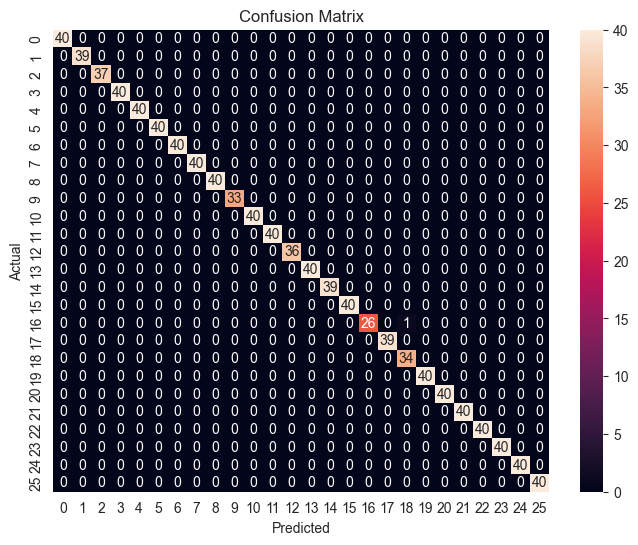

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_predict, y_test)

class_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
              10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S',
              19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

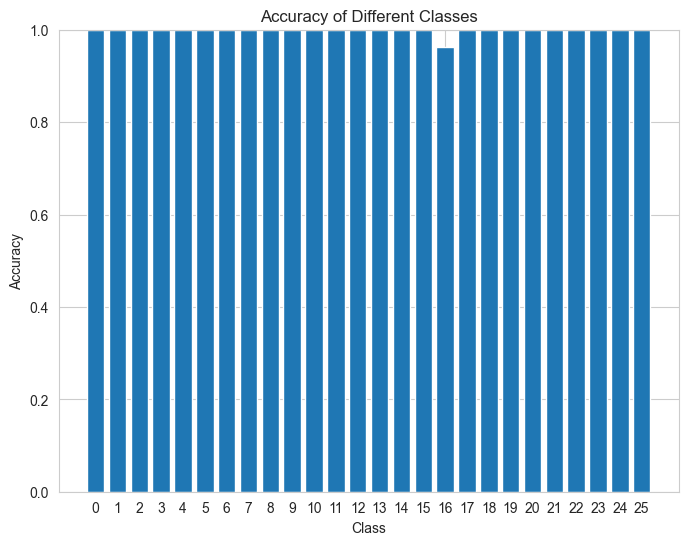

In [9]:
# Calculate accuracy for each class
class_accuracy = np.diag(cm) / np.sum(cm, axis=1)

# Plot accuracy of different rows (classes)
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(class_accuracy)), class_accuracy, tick_label=np.arange(len(class_accuracy)))
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classes')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.show()


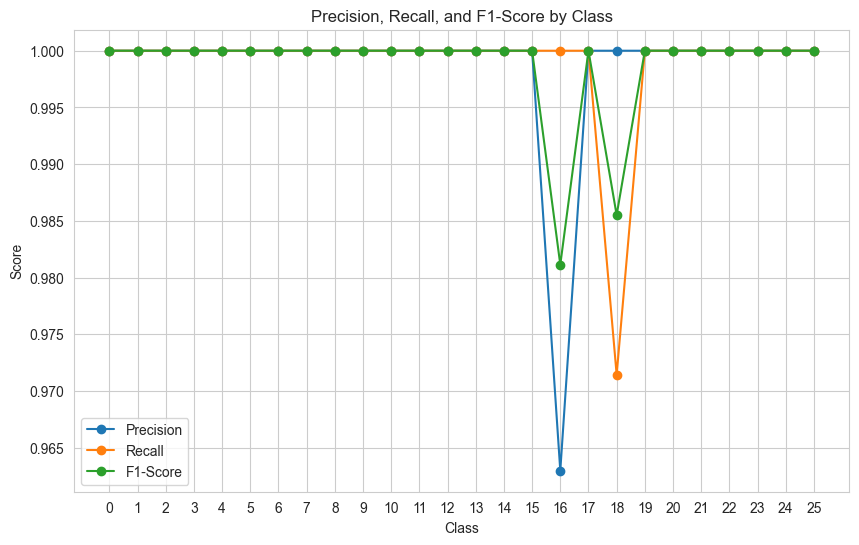

In [19]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
# Calculate precision, recall, and F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_predict)

# class_dict[key] for key in sorted(class_dict.keys())
# Plot line graph for precision, recall, and F1-score
# classes = np.arange(len(diagonal_values))  # Assuming classes are labeled as 0, 1, 2, ...
# class_labels = [class_dict[i] for i in classes]

plt.figure(figsize=(10, 6))
plt.plot(classes, precision, label='Precision', marker='o')
plt.plot(classes, recall, label='Recall', marker='o')
plt.plot(classes, f1_score, label='F1-Score', marker='o')
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score by Class')
plt.xticks(classes)
plt.legend()
plt.grid(True)
plt.show()

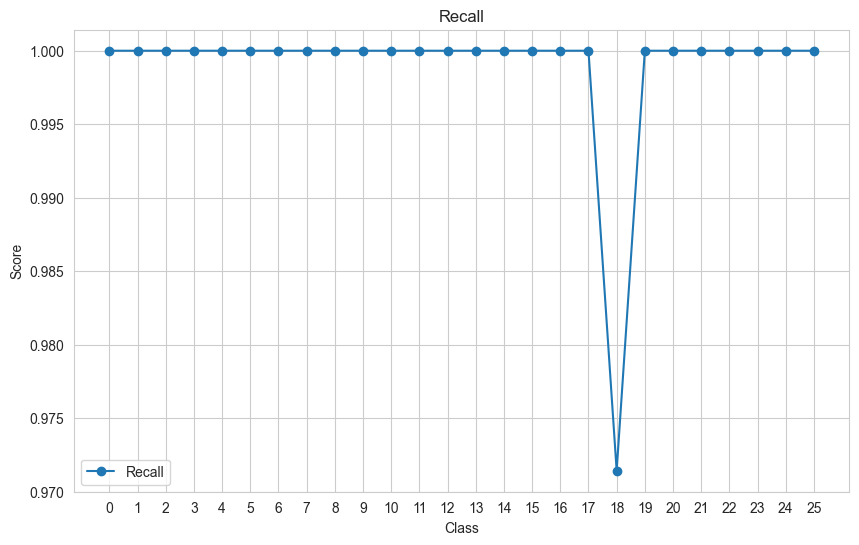

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(classes, recall, label='Recall', marker='o')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Recall')
plt.xticks(classes)
plt.legend()
plt.grid(True)
plt.show()

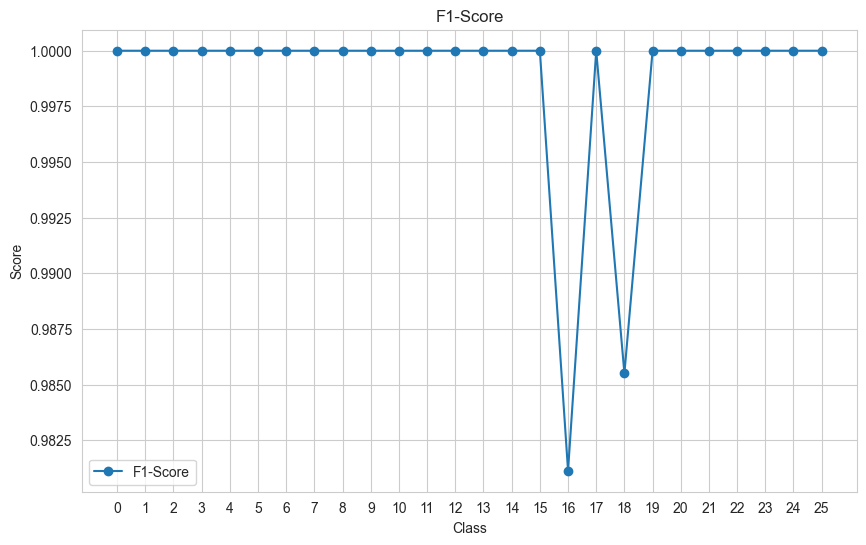

In [22]:
plt.figure(figsize=(10, 6))

plt.plot(classes, f1_score, label='F1-Score', marker='o')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('F1-Score')
plt.xticks(classes)
plt.legend()
plt.grid(True)
plt.show()

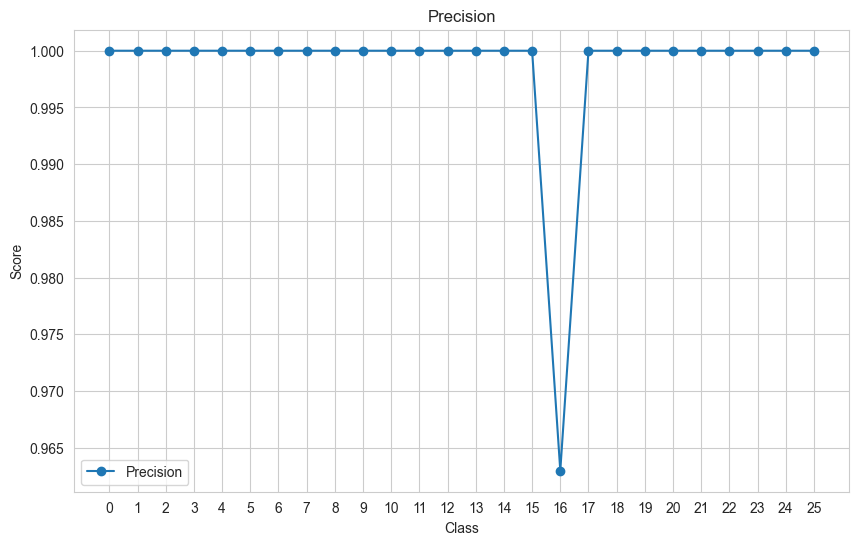

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(classes, precision, label='Precision', marker='o')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision')
plt.xticks(classes)
plt.legend()
plt.grid(True)
plt.show()

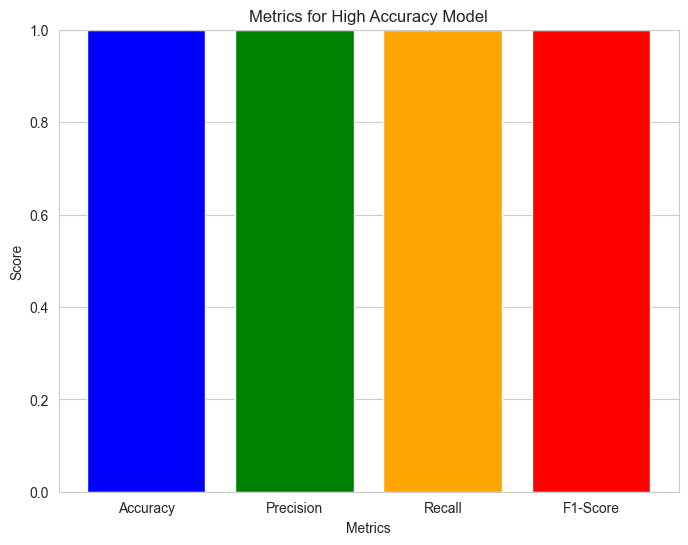

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate metrics
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict,average='macro')
recall = recall_score(y_test, y_predict,average='macro')
f1 = f1_score(y_test, y_predict, average='macro')

# Plot bar graph for metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Metrics for High Accuracy Model')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for scores
plt.show()

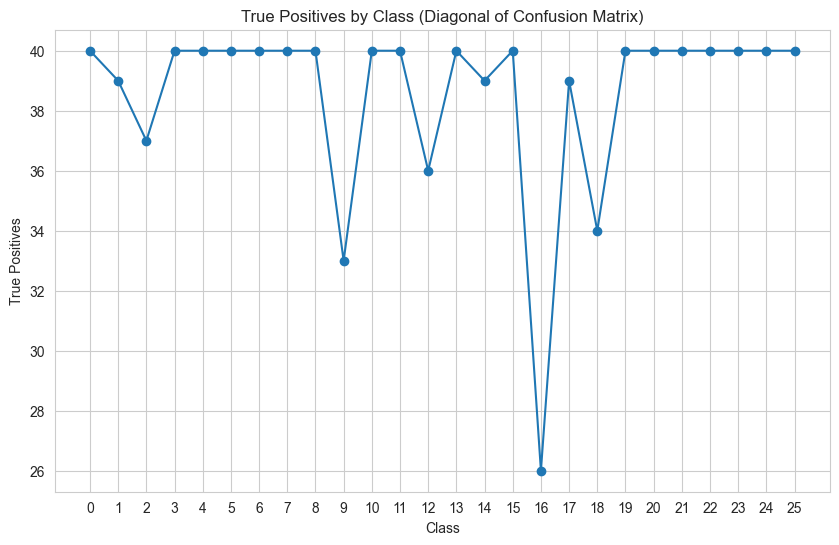

In [14]:
# Extract diagonal elements (true positives for each class)
diagonal_values = np.diag(cm)

# Plot line graph for diagonal values
classes = np.arange(len(diagonal_values))
class_labels = [class_dict[i] for i in classes]
plt.figure(figsize=(10, 6))
plt.plot(classes, diagonal_values, marker='o')
plt.xlabel('Class')
plt.ylabel('True Positives')
plt.title('True Positives by Class (Diagonal of Confusion Matrix)')
plt.xticks(classes)
plt.grid(True)
plt.show()